A partir de un txt donde se almacenan los resultados de la validacion de los distintos modelos con distintas fuerzas y probabilidad de augmentacion.
Como resultado se espera obtener un heatmap de los modelos que mejor resultado dieron 

# Heatmap etapa 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
txt = 'drishti_etapa2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')



['DC_DRISHTI_augm_f-10_p-10 ', 'DC_DRISHTI_augm_f-10_p-25 ', 'DC_DRISHTI_augm_f-10_p-50 ', 'DC_DRISHTI_augm_f-10_p-75 ', 'DC_DRISHTI_augm_f-25_p-10 ', 'DC_DRISHTI_augm_f-25_p-25 ', 'DC_DRISHTI_augm_f-25_p-50 ', 'DC_DRISHTI_augm_f-25_p-75 ', 'DC_DRISHTI_augm_f-50_p-10 ', 'DC_DRISHTI_augm_f-50_p-25 ', 'DC_DRISHTI_augm_f-50_p-50 ', 'DC_DRISHTI_augm_f-50_p-75 ', 'DC_DRISHTI_augm_f-75_p-10 ', 'DC_DRISHTI_augm_f-75_p-25 ', 'DC_DRISHTI_augm_f-75_p-50 ', 'DC_DRISHTI_augm_f-75_p-75 '] 

[0.267697811126709, 0.29142245650291443, 0.2826521396636963, 0.3006460666656494, 0.27796670794487, 0.28145620226860046, 0.2839098274707794, 0.28207701444625854, 0.256136417388916, 0.24595336616039276, 0.29587897658348083, 0.3401680290699005, 0.2658293843269348, 0.31097856163978577, 0.3286125361919403, 0.3591783940792084] 

[0.8848614033733606, 0.8920152290604546, 0.8726697899011624, 0.8897021523225257, 0.881251539958557, 0.8815239304880247, 0.8758128955316055, 0.8668337152540235, 0.8837381390728923, 0.8809720414

In [39]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))
oc_mat = np.zeros((4,4))
od_mat = np.zeros((4,4))
name_mat = np.array((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.8848614  0.89201523 0.87266979 0.88970215]
 [0.88125154 0.88152393 0.8758129  0.86683372]
 [0.88373814 0.88097204 0.88577107 0.83723736]
 [0.89462347 0.88476571 0.86510406 0.82121323]]


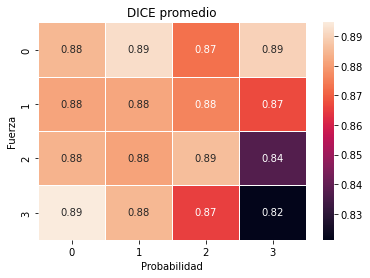

In [51]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

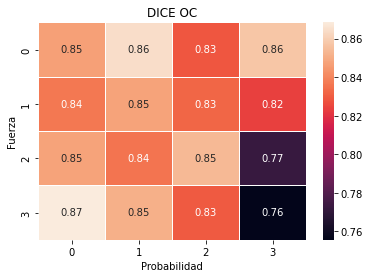

In [49]:
ax = sns.heatmap(oc_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OC')

plt.show()

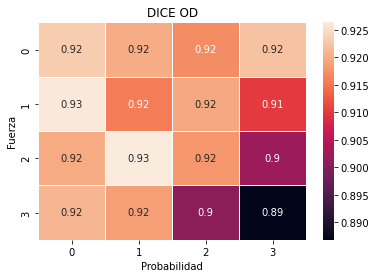

In [50]:
ax = sns.heatmap(od_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OD')

plt.show()

# Heatmap de la etapa 1


In [56]:
txt = 'drishti_etapa1_val_matrix.txt'
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['DRISHTI_augm_f-10_p-10 ', 'DRISHTI_augm_f-10_p-25 ', 'DRISHTI_augm_f-10_p-50 ', 'DRISHTI_augm_f-10_p-75 ', 'DRISHTI_augm_f-25_p-10 ', 'DRISHTI_augm_f-25_p-25 ', 'DRISHTI_augm_f-25_p-50 ', 'DRISHTI_augm_f-25_p-75 ', 'DRISHTI_augm_f-50_p-10 ', 'DRISHTI_augm_f-50_p-25 ', 'DRISHTI_augm_f-50_p-50 ', 'DRISHTI_augm_f-50_p-75 ', 'DRISHTI_augm_f-75_p-10 ', 'DRISHTI_augm_f-75_p-25 ', 'DRISHTI_augm_f-75_p-50 ', 'DRISHTI_augm_f-75_p-75 '] 

[0.013126589357852936, 0.01271850150078535, 0.01077883318066597, 0.015358026139438152, 0.015299543738365173, 0.013217130675911903, 0.01388532668352127, 0.014742945320904255, 0.009913768619298935, 0.011896814219653606, 0.01470374595373869, 0.012851744890213013, 0.015983402729034424, 0.01072628516703844, 0.015633083879947662, 0.0174972303211689] 

[0.9086440888569809, 0.9088057177150963, 0.91574192828863, 0.8951466810869271, 0.8974952245150527, 0.9024890270917322, 0.8923872516106913, 0.9017020208730052, 0.9280955998363817, 0.916526285216381, 0.8974451675102435,

In [57]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.90864409 0.90880572 0.91574193 0.89514668]
 [0.89749522 0.90248903 0.89238725 0.90170202]
 [0.9280956  0.91652629 0.89744517 0.91351421]
 [0.89633393 0.9297758  0.90378823 0.90584599]]


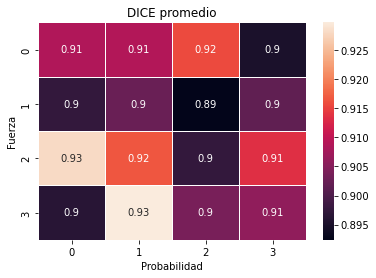

In [58]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()